<a href="https://colab.research.google.com/github/binesh-b0/Data_Science/blob/main/CNN_TF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

CIFAR-10 dataset

In [ ]:
# import tensorflow
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [ ]:
# download daatset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
# normalizing
x_train = x_train/255.0
x_test = x_test/255.0

convolution model

In [ ]:
# basic cnn model - feature extraction
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# add dense layers to classify
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode="auto", patience=3)

mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(x_train,y_train,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[es,mc],
                    verbose=2)

Epoch 1/50
1250/1250 - 62s - loss: 1.5896 - accuracy: 0.4101 - val_loss: 1.3347 - val_accuracy: 0.5232 - 62s/epoch - 49ms/step
Epoch 2/50
1250/1250 - 5s - loss: 1.2348 - accuracy: 0.5592 - val_loss: 1.1618 - val_accuracy: 0.5864 - 5s/epoch - 4ms/step
Epoch 3/50
1250/1250 - 5s - loss: 1.0855 - accuracy: 0.6154 - val_loss: 1.0448 - val_accuracy: 0.6351 - 5s/epoch - 4ms/step
Epoch 4/50
1250/1250 - 5s - loss: 0.9928 - accuracy: 0.6500 - val_loss: 1.0027 - val_accuracy: 0.6515 - 5s/epoch - 4ms/step
Epoch 5/50
1250/1250 - 4s - loss: 0.9390 - accuracy: 0.6686 - val_loss: 1.0835 - val_accuracy: 0.6220 - 4s/epoch - 3ms/step
Epoch 6/50
1250/1250 - 5s - loss: 0.8840 - accuracy: 0.6909 - val_loss: 0.9510 - val_accuracy: 0.6734 - 5s/epoch - 4ms/step
Epoch 7/50
1250/1250 - 4s - loss: 0.8411 - accuracy: 0.7059 - val_loss: 0.9753 - val_accuracy: 0.6649 - 4s/epoch - 3ms/step
Epoch 8/50
1250/1250 - 4s - loss: 0.8094 - accuracy: 0.7179 - val_loss: 0.9826 - val_accuracy: 0.6620 - 4s/epoch - 3ms/step
Epoch

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9294 - accuracy: 0.6985


[0.9294320344924927, 0.6984999775886536]

In [ ]:
saved_model = tf.keras.models.load_model('best_model.h5')
saved_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9294 - accuracy: 0.6985


[0.9294320344924927, 0.6984999775886536]

In [ ]:
history.history['accuracy']

[0.4101249873638153,
 0.5592250227928162,
 0.6154249906539917,
 0.6500499844551086,
 0.668624997138977,
 0.6908749938011169,
 0.7058749794960022,
 0.7178999781608582,
 0.7288249731063843,
 0.7419000267982483,
 0.7472500205039978,
 0.7537750005722046,
 0.7640249729156494,
 0.7699750065803528,
 0.7749249935150146,
 0.7843499779701233]

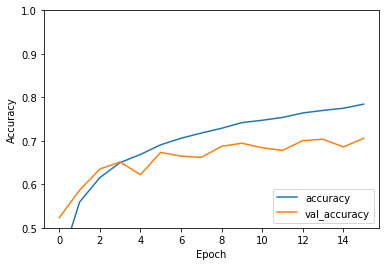

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# prediciton
np.set_printoptions(suppress=True)
predict = saved_model.predict(x_test)

[0.00048286 0.9799651  0.00004766 0.00160286 0.00000094 0.00706131
 0.00011665 0.00018786 0.0000011  0.01053367]
[1]


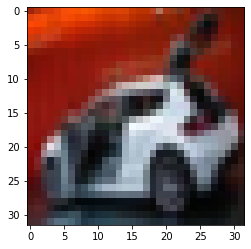

In [ ]:
index =6
print(predict[index])
plt.imshow(x_test[index])
print(y_test[index])